In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
csv_path = "D:\\Douglas\\MLProjects\\investments_VC.csv"

In [4]:
df = pd.read_csv(csv_path, encoding='unicode_escape')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,Success
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,1
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,1
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0,0,0,0,0,0,0,0,0,1
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0,0,0,0,0,0,0,0,0,1
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0,0,0,0,0,0,0,0,0,1


In [5]:
#Casting Funding to Numeric
df[' funding_total_usd '] = pd.to_numeric(df[' funding_total_usd '].str.replace(',', '').str.replace('$', ''), errors='coerce')

C:\Users\tlyra\AppData\Local\Temp\ipykernel_20068\2071609082.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[' funding_total_usd '] = pd.to_numeric(df[' funding_total_usd '].str.replace(',', '').str.replace('$', ''), errors='coerce')


In [6]:
## Create separate DF for the top 10 market, grouping it so we can sum the total amount of funding per market
# sorting in descending order and then grabing only the first 10 rows
top10Market = pd.DataFrame({
    'market':df[' market '],
    'funding_usd':df[' funding_total_usd ']
}).groupby('market')['funding_usd'].agg(    
    Total='sum'
).sort_values(by='Total', ascending=False
).head(10)



In [7]:
## Create separate DF for the top 10 countries, grouping it so we can sum the total amount of funding per market
# sorting in descending order and then grabing only the first 10 rows
top10Countries = pd.DataFrame({
    'country_code':df['country_code'],
    'funding_usd':df[' funding_total_usd ']
}).groupby('country_code')['funding_usd'].agg(
    total_funding = 'sum'
).sort_values(by='total_funding',ascending=False).head(10)

In [8]:
# Filtering initial dataset for top 10 market and top 10 Country
df_top10CountriesAndMarket = df[
    df[' market '].isin(top10Market.index) &
    df['country_code'].isin(top10Countries.index)
]

In [9]:
# Creating the dataframe with aggregating the data by the number of startups
df_top10CountriesAndMarket_startupCount = pd.DataFrame({
    'country_code':df_top10CountriesAndMarket['country_code'],
    'market':df_top10CountriesAndMarket[' market '],
    'qtd_startups': 1
}).groupby(['country_code','market'])['qtd_startups'].agg(
    qtd_startups='sum'
).reset_index().astype({
    'qtd_startups':int
})


In [10]:
#Creating the pivot for heatMap
heatmap_data = df_top10CountriesAndMarket_startupCount.pivot('country_code','market','qtd_startups')

C:\Users\tlyra\AppData\Local\Temp\ipykernel_20068\4286513388.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df_top10CountriesAndMarket_startupCount.pivot('country_code','market','qtd_startups')


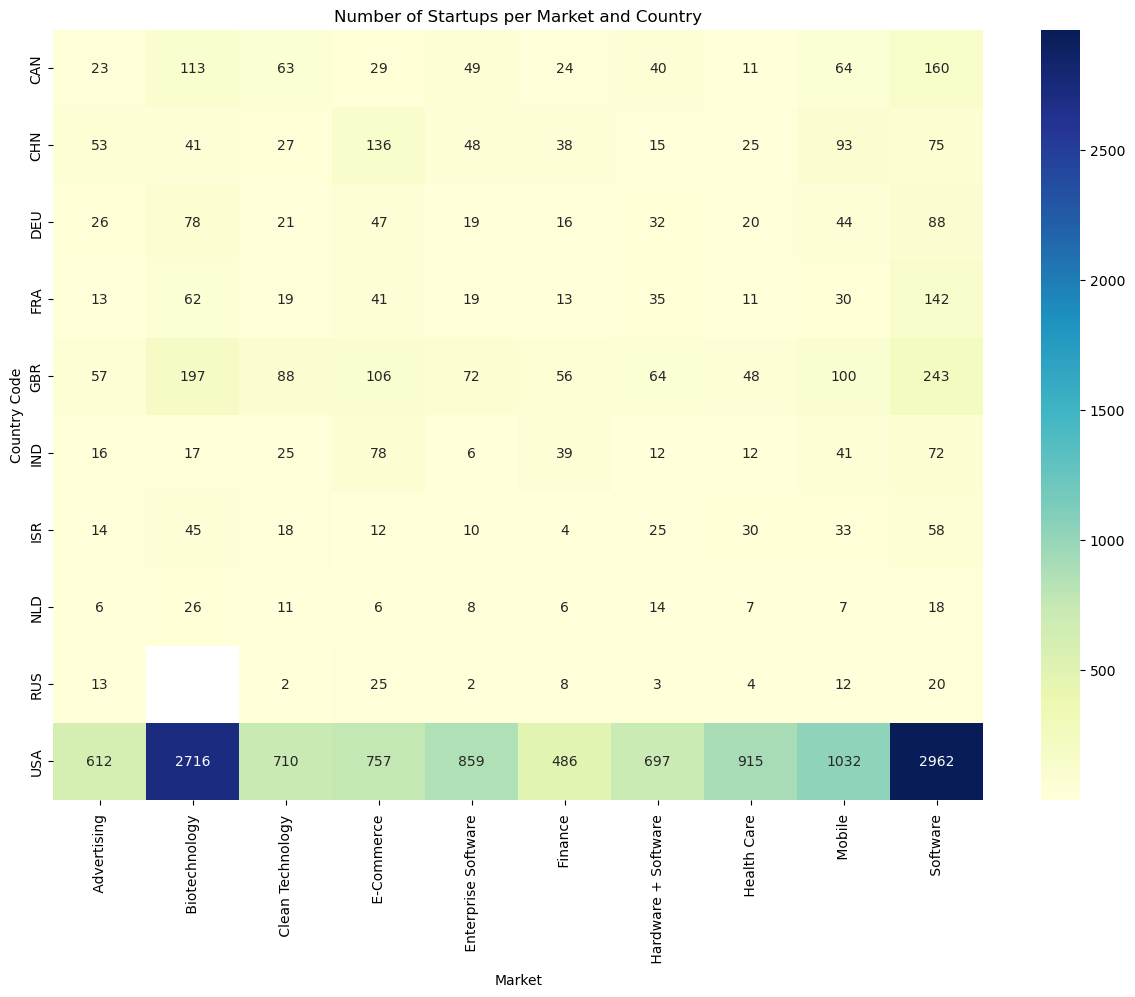

In [11]:
#Ploting Heatmap
plt.figure(figsize=(15,10))
sb.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Number of Startups per Market and Country')
plt.ylabel('Country Code')
plt.xlabel('Market')
plt.show()

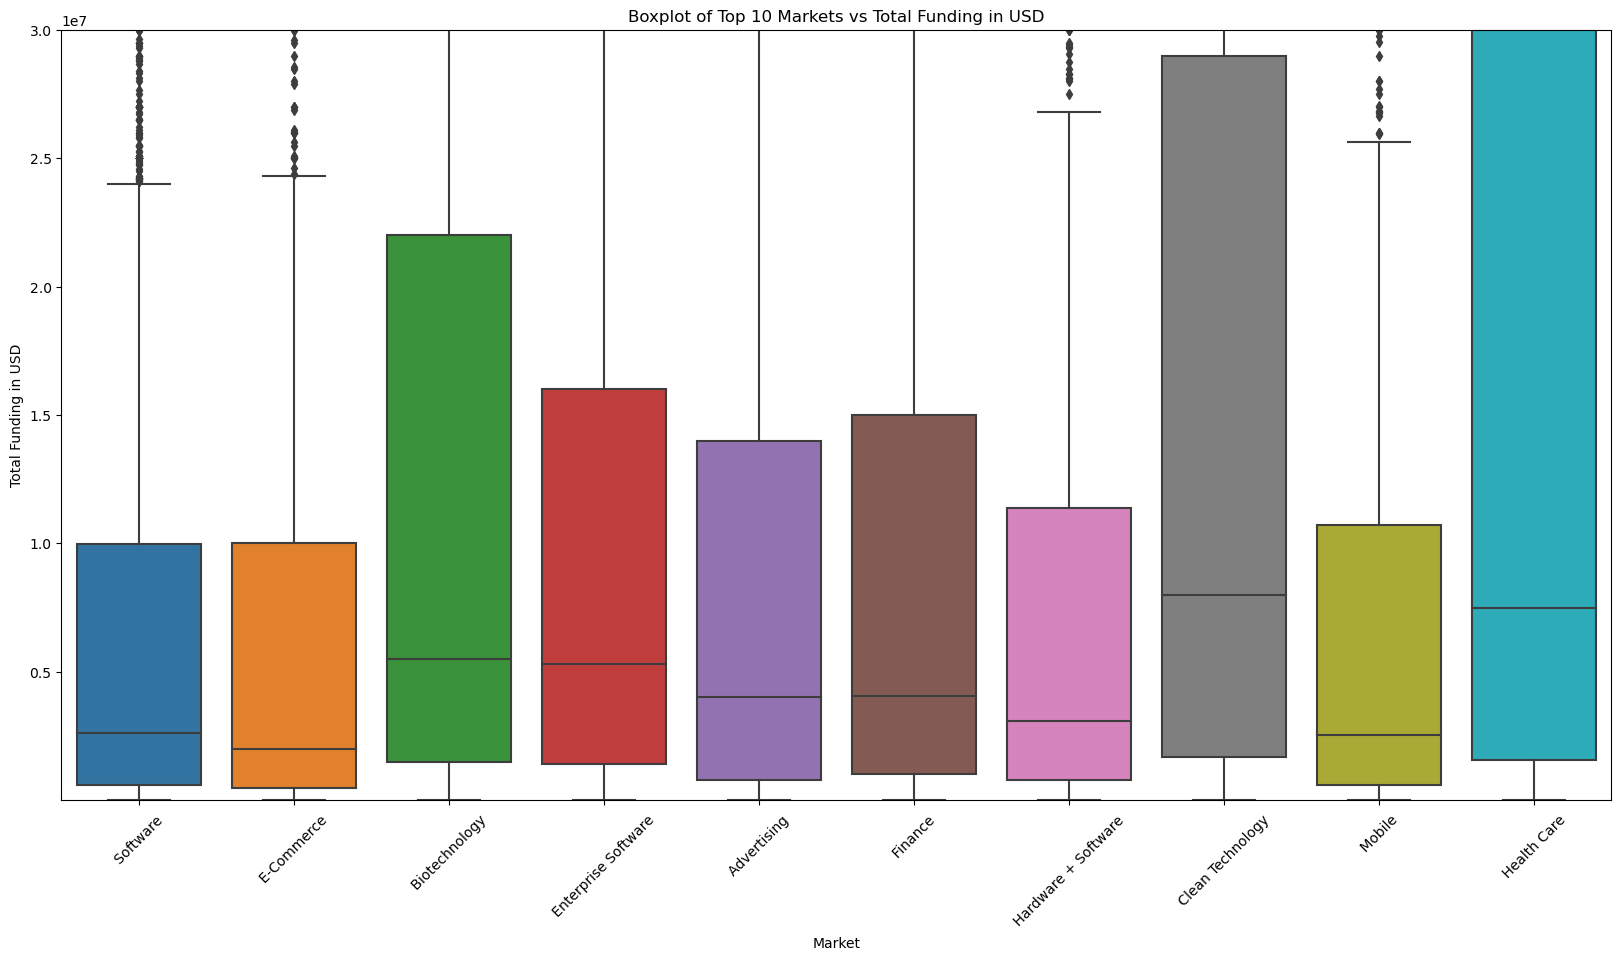

In [35]:
plt.figure(figsize=(20,10))
sb.boxplot(x=' market ',y=' funding_total_usd ',data=df_top10CountriesAndMarket)
plt.title('Boxplot of Top 10 Markets vs Total Funding in USD')
plt.xticks(rotation=45)
plt.ylim(10**1,3*10**7)
plt.ylabel("Total Funding in USD")
plt.xlabel("Market")
plt.show()

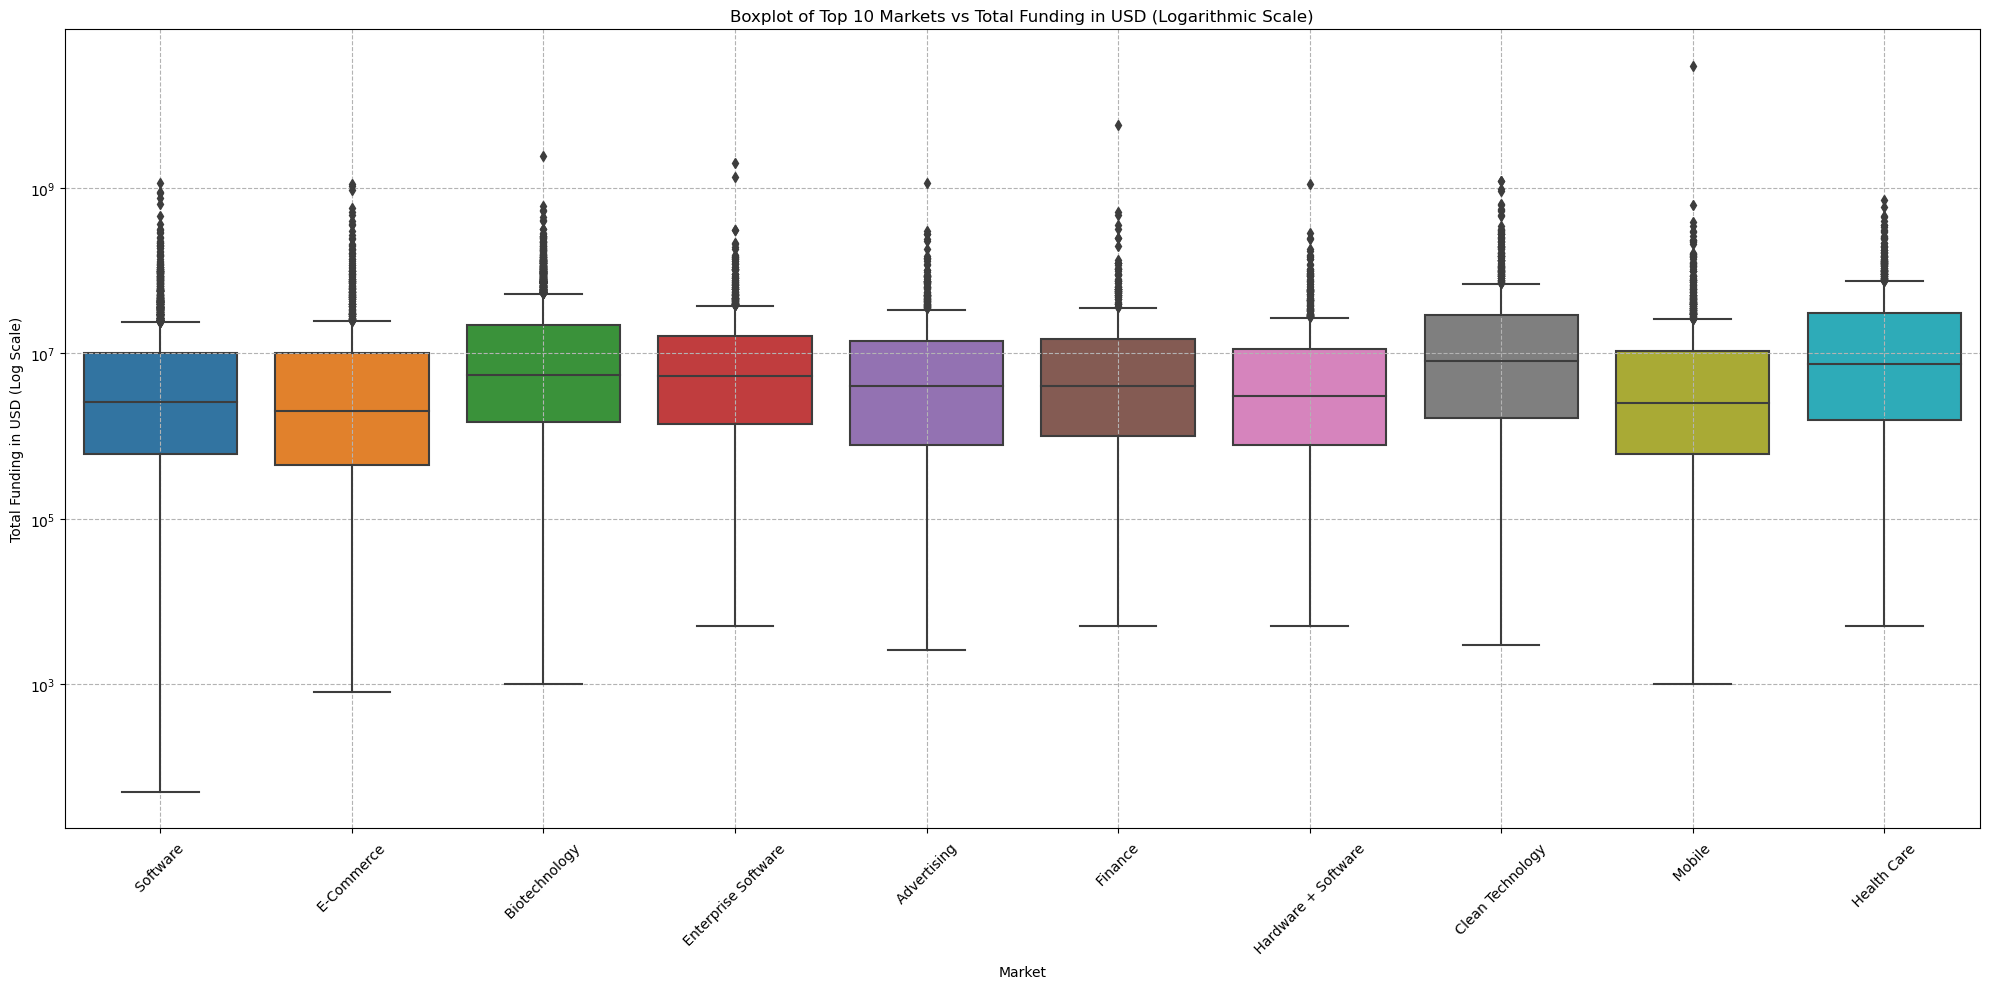

In [17]:
plt.figure(figsize=(20,10))
sb.boxplot(x=' market ', y=' funding_total_usd ', data=df_top10CountriesAndMarket)
plt.yscale("log")
plt.title('Boxplot of Top 10 Markets vs Total Funding in USD (Logarithmic Scale)')
plt.xticks(rotation=45)
plt.ylabel("Total Funding in USD (Log Scale)")
plt.xlabel("Market")
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()

plt.show()

In [53]:
df_fundingPerYear = pd.DataFrame({
    'Year': pd.to_datetime(df_top10CountriesAndMarket['first_funding_at'],errors='coerce').dt.year,
    'funding_usd':df_top10CountriesAndMarket[' funding_total_usd ']
}).groupby('Year')['funding_usd'].agg(
    Total='sum'
).reset_index()


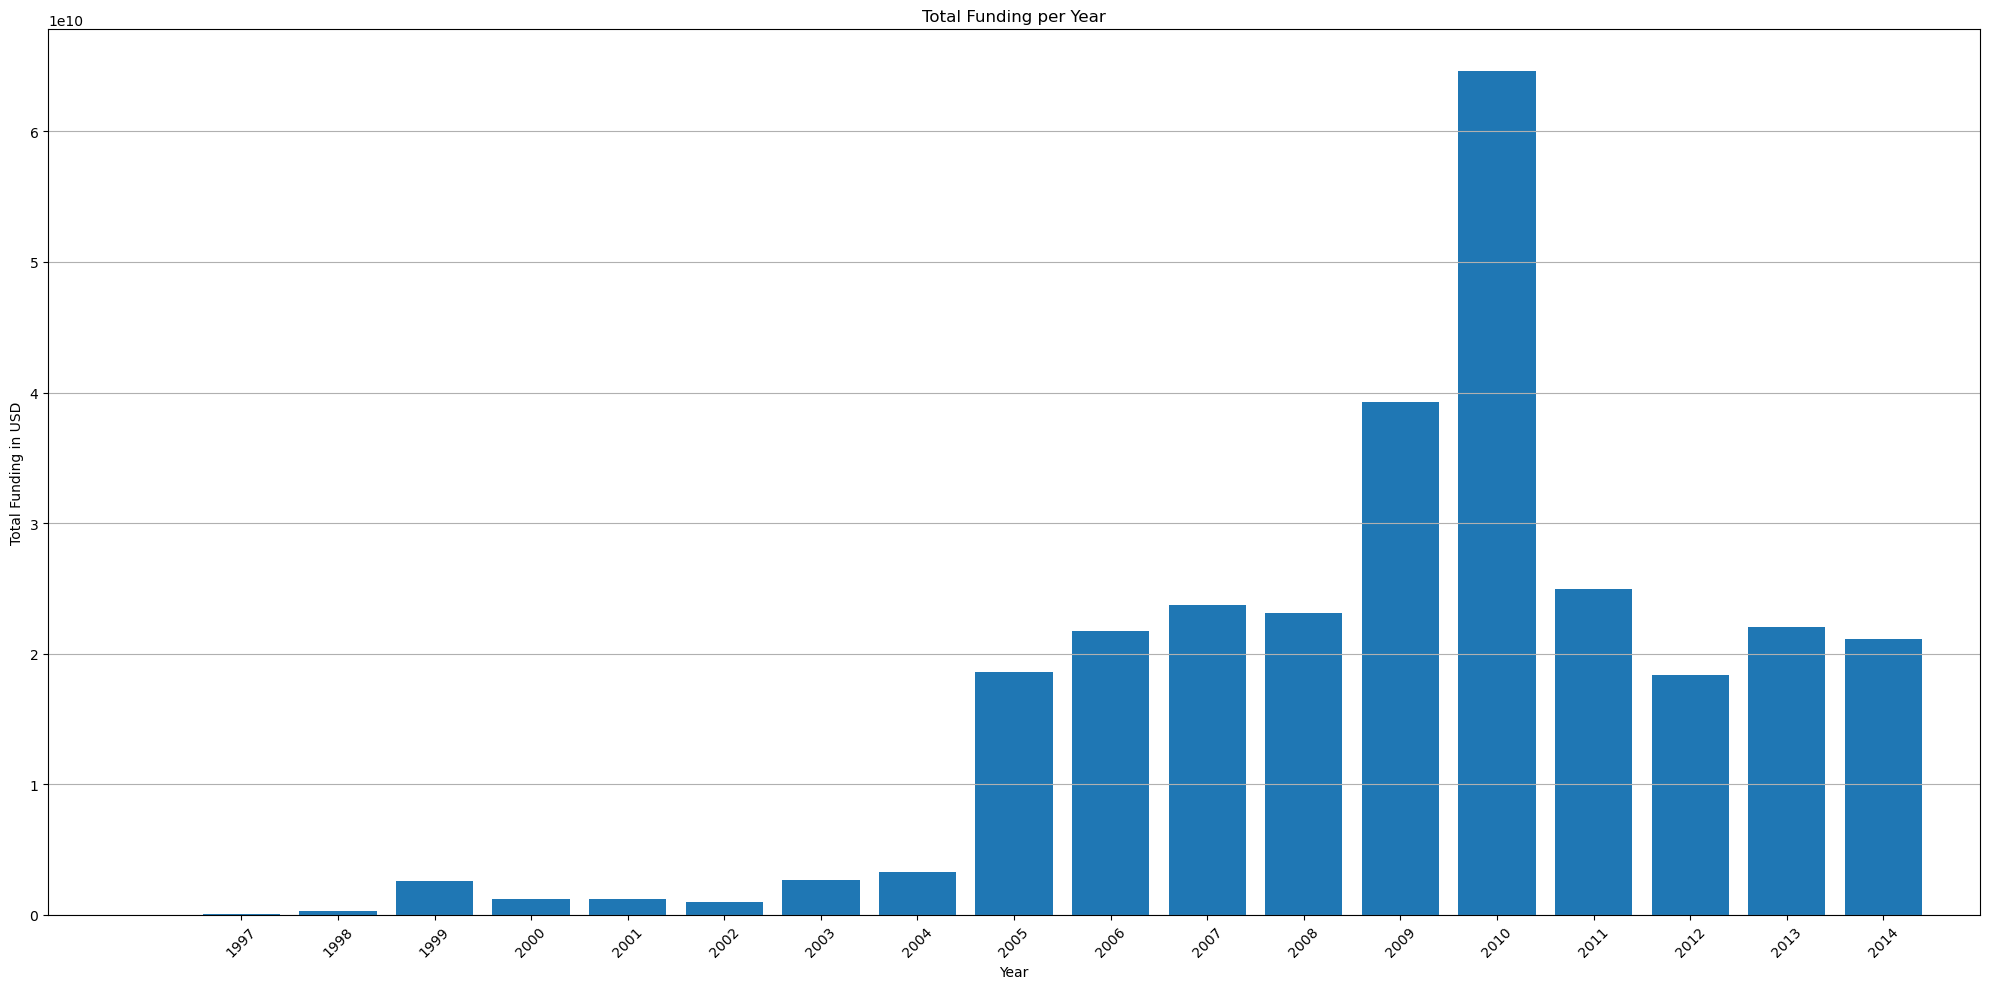

In [52]:
plt.figure(figsize=(20,10))
plt.bar(df_fundingPerYear['Year'], df_fundingPerYear['Total'])
plt.title('Total Funding per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding in USD')
plt.xlim(1995,2015)
plt.xticks(range(1997,2015),rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [62]:
founded_values, fcounts = np.unique(pd.to_datetime(df_top10CountriesAndMarket["founded_at"], errors='coerce').dt.year, return_counts=True)
founded_values = np.delete(founded_values,-1)
fcounts = np.delete(fcounts,-1)

df_startup_founded = pd.DataFrame({
    'Year Founded' : founded_values.astype(int),
    'No of Startups' : fcounts
})


In [63]:
ffunded_values, ffcounts = np.unique(pd.to_datetime(df_top10CountriesAndMarket["first_funding_at"], errors='coerce').dt.year, return_counts=True)
ffunded_values = np.delete(ffunded_values,-1)
ffcounts = np.delete(ffcounts,-1)

In [65]:
df_startup_ffunded = pd.DataFrame({
    'Year Funded' : ffunded_values.astype(int),
    'No of Startups' : ffcounts
})


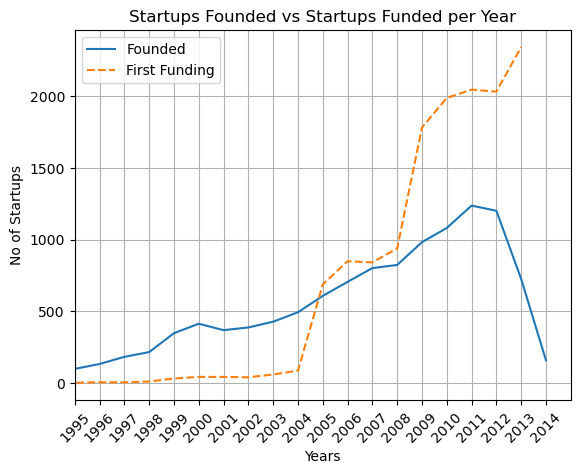

In [69]:
plt.plot(df_startup_founded['Year Founded'],df_startup_founded["No of Startups"],ls='-')
plt.plot(df_startup_ffunded['Year Funded'],df_startup_ffunded["No of Startups"],ls='--')
plt.xlim(1995,2015)
plt.legend(['Founded','First Funding'],loc='best')
plt.xlabel('Years')
plt.ylabel('No of Startups')
plt.xticks(range(1995,2015),rotation=45)
plt.title('Startups Founded vs Startups Funded per Year' )
plt.grid()
plt.show()

In [103]:
df_success_data = pd.DataFrame({
    'Year': pd.to_datetime(df_top10CountriesAndMarket['founded_at'],errors='coerce').dt.year,
    'is_Operating': df_top10CountriesAndMarket['Success'] == 1,
    'Closed': df_top10CountriesAndMarket['Success'] == 0
})

In [104]:
df_success_aggregated = df_success_data.groupby('Year').agg({
    'is_Operating': 'sum',
    'Closed': 'sum'
}).reset_index()

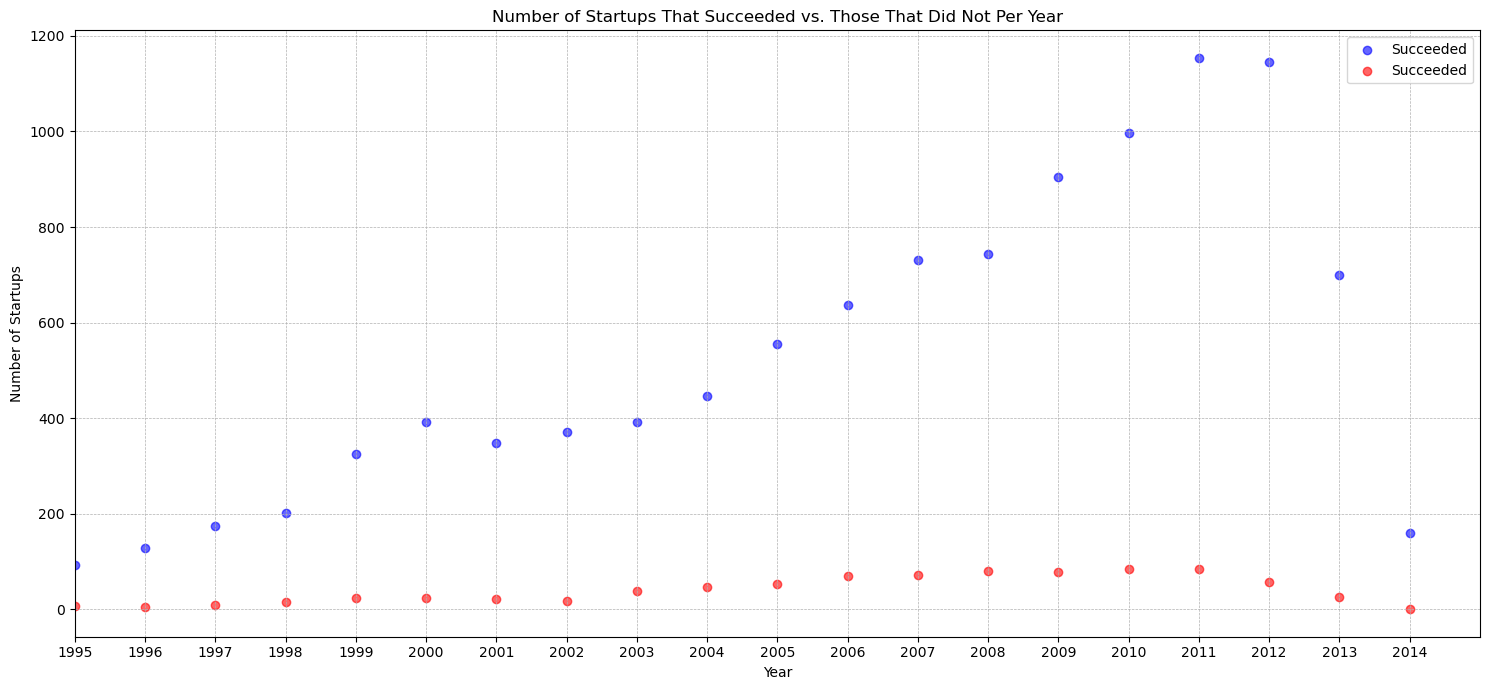

In [105]:
plt.figure(figsize=(15,7))
plt.scatter(df_success_aggregated['Year'], df_success_aggregated['is_Operating'], color='blue', label='Succeeded', alpha=0.6)
plt.scatter(df_success_aggregated['Year'], df_success_aggregated['Closed'], color='red', label='Succeeded', alpha=0.6)
plt.title('Number of Startups That Succeeded vs. Those That Did Not Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.xlim(1995,2015)
plt.legend()
plt.xticks(range(1995,2015))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()